# Natural Language Processing with Disaster Tweets

In [1]:
import pandas as pd

Load Data

In [2]:
train_df = pd.read_csv(r"train.csv")
test_df = pd.read_csv(r"test.csv")
submission = pd.read_csv('sample_submission.csv')

Explore Data

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.shape

(7613, 5)

In [6]:
test_df.shape

(3263, 4)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 208.2+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.8+ KB


In [9]:
train_df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [10]:
test_df.describe(include='all')

,id,keyword,location,text
count,3263.000000,3237,2158,3263
unique,NaN,221,1602,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5427.152927,NaN,NaN,NaN
std,3146.427221,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2683.000000,NaN,NaN,NaN
50%,5500.000000,NaN,NaN,NaN
75%,8176.000000,NaN,NaN,NaN


In [11]:
print(train_df.target.value_counts())

0    4342
1    3271
Name: target, dtype: int64


In [12]:
train_df.keyword.unique()[:20]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze'],
      dtype=object)

In [13]:
train_df.location.unique()[:20]

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA',
       'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!',
       'Paranaque City', 'Live On Webcam', 'milky way',
       'GREENSBORO,NORTH CAROLINA', 'England.',
       'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim',
       'Abuja', 'USA', 'South Africa'], dtype=object)

In [14]:
print('NO. Unique Keyword : ',len(train_df.keyword.unique()))
train_df.keyword.value_counts(ascending=False)

NO. Unique Keyword :  222


fatalities               45
deluge                   42
armageddon               42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
print('NO. Unique Location : ',len(train_df.location.unique()))
train_df.location.value_counts(ascending=False)

NO. Unique Location :  3342


USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Greater Los Angeles Bearia      1
Carregado                       1
FILM OUT LATE 2015              1
Oxford, MS                      1
Skyhold                         1
Name: location, Length: 3341, dtype: int64

In [16]:
words = []
for i in train_df.text:
    words.extend(i.split())
print('unique words : ',len(set(words)))
print('total words :',len(words))

unique words :  31924
total words : 113461


In [17]:
from collections import Counter
Counter(words).most_common(10)

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773)]

### Visualizing the Tweets

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

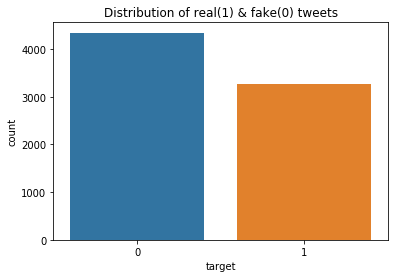

In [19]:
# Visualizations for the count of target variables
sns.countplot( x = "target", data = train_df)
plt.title("Distribution of real(1) & fake(0) tweets")
plt.show()

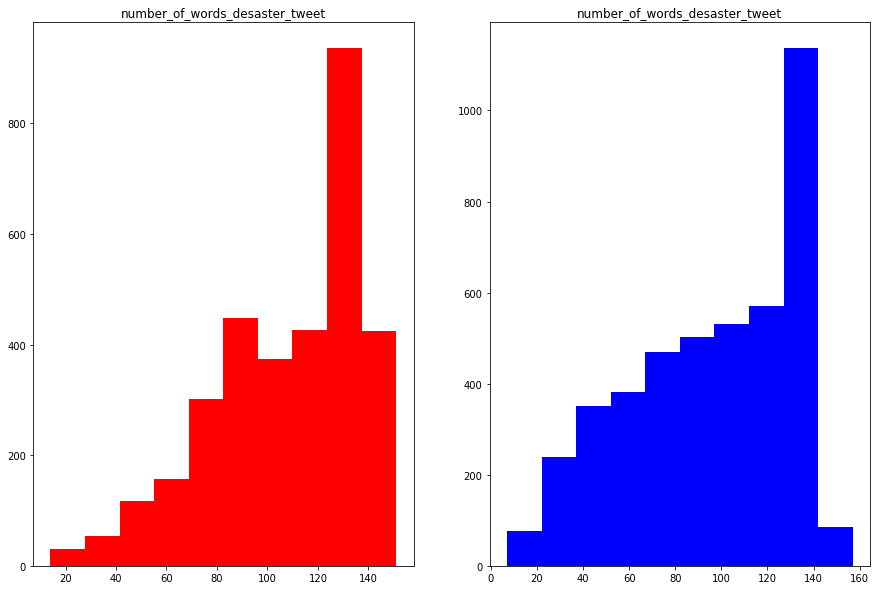

In [20]:
number_of_words_desaster_tweet = train_df[train_df.target==1].text.str.len()
number_of_words_non_desaster_tweet = train_df[train_df.target==0].text.str.len()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
ax1.hist(number_of_words_desaster_tweet, color = 'r')
ax2.hist(number_of_words_non_desaster_tweet, color  = 'b')
ax1.set_title("number_of_words_desaster_tweet")
ax2.set_title("number_of_words_desaster_tweet")
plt.show()

## Pre-processing & EDA

In [21]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [22]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [23]:
# drop the null values columns
train_df.drop(['keyword','location','id'], axis = 1, inplace = True)
# drop the null values columns
test_df.drop(['keyword','location','id'], axis = 1, inplace = True)

In [24]:
train_df.head(3)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1


In [25]:
test_df.head(3)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."


###### Function to clean the data

In [26]:
import re
from string import punctuation


In [27]:
import nltk
from nltk.corpus import stopwords

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# To remove numbers, html tags, urls, special characters, stop words, punctuations
def clean_text(text):
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Split the Dataset

In [30]:
from sklearn.model_selection import train_test_split

# Extracting X matrix and y vector
X = train_df["text"].to_numpy()
y = train_df["target"].to_numpy()

# splitting the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(6851, 762, 6851, 762)

### Text Normalization Using TfidfVectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Creating TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, analyzer=clean_text, ngram_range=(1,3), min_df=1, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

test_texts = vectorizer.transform(test_df["text"])

## Model Building

In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)

## Metrics

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


###### Accuracy Score

In [35]:
# finding accuracy_score
print("Accuracy Score is =",accuracy_score(y_test, y_pred))

Accuracy Score is = 0.7729658792650919


###### Confusion Matrix

In [36]:
import seaborn as sns

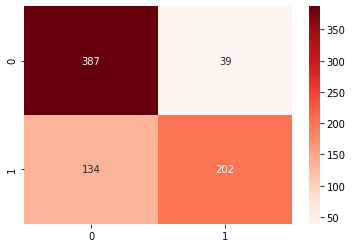

In [37]:
# calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.3g')

###### Classification Report

In [38]:
# printing classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       426
           1       0.84      0.60      0.70       336

    accuracy                           0.77       762
   macro avg       0.79      0.75      0.76       762
weighted avg       0.78      0.77      0.77       762



In [39]:
submission["target"] = model.predict(test_texts)
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [40]:
submission.to_csv('Submission.csv', index=False)

In [41]:
df = pd.read_csv('Submission.csv')

In [42]:
df.shape

(3263, 2)

In [43]:
df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
